In [1]:
import numpy as np
import os
import shutil

In [2]:
orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_ms.txt"

In [3]:
gx = np.zeros((15158, 361))
i = 0
with open(orig_file, 'r') as instream:
    header_orig = next(instream)
    for line in instream:
        linesplit = line.strip().split()
        gx[i, :] = np.array([float(x) for x in linesplit[1:]])
        i += 1

In [7]:
n_pc = 10

M = gx.T.copy()
U, s, Vt = np.linalg.svd(M, full_matrices=False)
V = Vt.T

pc = np.sqrt(s[:n_pc]) * V[:, :n_pc]

In [16]:
gxcorr = np.zeros_like(gx)
pcsum = np.sum(pc, axis = 1)
for i in range(gx.shape[0]):
    gxcorr[i, :] = gx[i, :] - pcsum[i]

In [17]:
nselect = np.sort(np.random.choice(15158, 4000, replace = False))
print(nselect)

for sim in range(5):
    simdir = "/scratch/sbanerj/trans-eqtl/simulation/15158_361_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02/sim{:03d}/input".format(sim)
    
    sim_file = os.path.join(simdir, "expression.txt_backup")
    backup_file = os.path.join(simdir, "expression_ms.txt")
    gene_names = list()
    with open(sim_file, 'r') as instream:
        header_sim  = next(instream)
        for line in instream:
            linesplit = line.strip().split()
            gene_names.append(linesplit[0])

    if not os.path.exists(backup_file):
        shutil.copyfile(sim_file, backup_file)

    target_file = os.path.join(simdir, "expression.txt")

    with open(target_file, 'w') as fout:
        fout.write(header_sim)
        for i in nselect:
            line = '{:s}\t'.format(gene_names[i]) + '\t'.join(['{:g}'.format(x) for x in gxcorr[i, :]]) + '\n'
            fout.write(line)

[    3     4     6 ... 15142 15149 15155]


In [18]:
#data = np.corrcoef(gx)
data = np.abs(np.corrcoef(gxcorr.T))

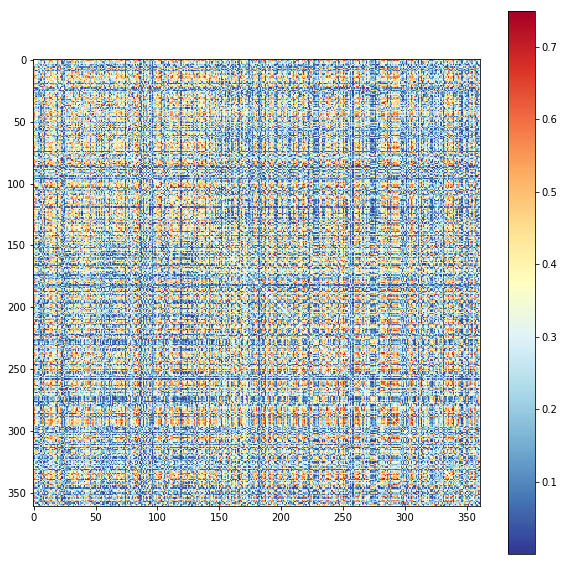

In [20]:
# mask = np.diag(np.ones(nselect.shape[0]))
mask = np.diag(np.ones(361))
masked_data = np.ma.masked_array(data, mask)

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

cmap = matplotlib.cm.get_cmap('RdYlBu_r')
cmap.set_bad('w')

im = ax1.imshow(masked_data, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()

In [21]:
data

array([[1.        , 0.27826948, 0.13524873, ..., 0.4730904 , 0.11547635,
        0.07283378],
       [0.27826948, 1.        , 0.37751821, ..., 0.25849535, 0.27684665,
        0.33383099],
       [0.13524873, 0.37751821, 1.        , ..., 0.07448761, 0.31465878,
        0.34224836],
       ...,
       [0.4730904 , 0.25849535, 0.07448761, ..., 1.        , 0.11985877,
        0.02589978],
       [0.11547635, 0.27684665, 0.31465878, ..., 0.11985877, 1.        ,
        0.49471916],
       [0.07283378, 0.33383099, 0.34224836, ..., 0.02589978, 0.49471916,
        1.        ]])